In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### IMPORT DATA

In [20]:
data = pd.read_csv('./students.csv')

In [21]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

### PREPROCESS DATA

In [23]:
print(data['Target'].unique())

['Dropout' 'Graduate' 'Enrolled']


In [24]:
# Since the value of target column are Dropout, Graduate, Enrolled which are text so we need to convert the to 0,1,2
data['Target']=data['Target'].map({'Dropout':0,'Graduate':1,'Enrolled':0 })

### SPLIT DATA

In [25]:
X=data.drop('Target',axis=1)
y=data['Target']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,
                                                    stratify=data['Target'],
                                                    random_state=1)

In [27]:
X_train = X_train.values
Y_train =y_train.values
X_test = X_test.values
Y_test = y_test.values

In [28]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])


In [29]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (34, 3096)
Shape of Y_train :  (1, 3096)
Shape of X_test :  (34, 1328)
Shape of Y_test :  (1, 1328)


### DEFINE MODEL    

In [32]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [33]:
def model(X,Y,learning_rate,iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.zeros((n,1))
    B=0

    cost_list=[]
    
    for i in range(iterations):
        Z = np.dot(W.T,X)+B
        A = sigmoid(Z)

        cost = -(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))

        dW = (1/m)*np.dot(A-Y,X.T)
        dB= (1/m)*np.sum(A-Y)

        W = W - learning_rate*dW.T
        B = B - learning_rate*dB

        cost_list.append(cost)

        if(i%(iterations/10)==1):
            print("cost after", i, "iterations is: ",cost)
    return W,B,cost_list

In [36]:
iterations = 10000
learning_rate = 0.0005
W,B, cost_list = model(X_train, Y_train, learning_rate=learning_rate,iterations=10000)

cost after 1 iterations is:  0.6907455226047099
cost after 1001 iterations is:  0.4396867510221307
cost after 2001 iterations is:  0.41022823665535874
cost after 3001 iterations is:  0.3961896595631223
cost after 4001 iterations is:  0.3871154510229824
cost after 5001 iterations is:  0.38039170647738474
cost after 6001 iterations is:  0.3750596346199576
cost after 7001 iterations is:  0.3706709201641847
cost after 8001 iterations is:  0.36697597630392037
cost after 9001 iterations is:  0.3638171162914136


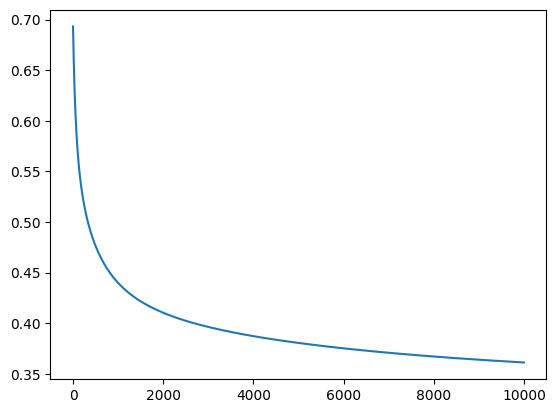

In [37]:
plt.plot(np.arange(iterations),cost_list)
plt.show()